In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots using this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: magrittr



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server. This is one of the main feature of CAVAanalytics


In [25]:
# this function has several arguments. To load CORDEX-CORE data simply specify path.to.data as CORDEX-XORE and the
# domain of interest. For example Sudan is in the African domain. 
# You can check the domain here (https://www.researchgate.net/figure/The-ten-CORDEX-CORE-model-domains-simulated-by-the-model-REMO-North-America-NAM_fig1_337370761)
# if you want to also load observatipnal data, simply specify W5E5 in path.to.obs and years.hist. 
# When you specify years.hist, you would automatically load the historical simulations run of CORDEX-CORE.
# aggr.m allows user to perform monthly aggregation if daily values are not needed. 
# This is almost always the case except when calculation of agroclimatic indicators is needed. 

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2030, 
                   years.hist = 2000,
                   path.to.obs = NULL, buffer = 0, domain = "AFR-22", xlim=NULL, ylim=NULL, aggr.m="none")



2023-05-11 17:04:01 Retrieving CORDEX-CORE data, RCM RegCM4. This may take a while... 


2023-05-11 17:04:02 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:04:30 Done


2023-05-11 17:04:04 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:04:27 Done


2023-05-11 17:04:05 Loading CORDEX-AFR-22_NCC-NorESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:04:31 Done


2023-05-11 17:04:32 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:07:32 Done


2023-05-11 17:04:32 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:07:41 Done


2023-05-11 17:04:33 Loading CORDEX-AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:07:56 Done


2023-05-11 17:07:57 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_v0

2023-05-11 17:11:15 Done


2023-05-11 17:07:57 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp85_r1i1p1_ICTP-RegCM4-7_

## 2nd step: projections
Projections is one of the function available in step 2 of the CAVAanalytics framework. As the name gives away, it is used to look at future projections. There are several arguments in this function. 

In [32]:
# this funciton does several things in the background. 
# Firstly, it is possuble to look at specific seasons with the argument season. 
# In this case we are looking at the whole year.
# Secondly, it is possible to perform bias correction and calculate agroclimatic indicators. 
# Those can be calculated only for daily data
proj <- projections(data=exmp1,season = 1:12,  bias.correction = FALSE, uppert = NULL, 
                    lowert = NULL, consecutive = F, duration = "max")


2023-05-11 17:15:04 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total  pr

2023-05-11 17:15:31 Done



In [30]:
# let's now calculate the number of dry days for the whole year and specified time period
proj_dry_days <- projections(data=exmp1,season = 1:12,  bias.correction = FALSE, uppert = NULL, 
                    lowert = 1, consecutive = F, duration = "max")


2023-05-11 17:14:16 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of number of days with pr below threshold of 1

2023-05-11 17:14:54 Done



## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way

### Cumulative mean precipitation 

2023-05-11 17:20:02
Visualizing ensemble mean

2023-05-11 17:20:02
Prepare for plotting

2023-05-11 17:20:02 Done

2023-05-11 17:20:03
Visualizing ensemble mean

2023-05-11 17:20:03
Prepare for plotting

2023-05-11 17:20:03 Done



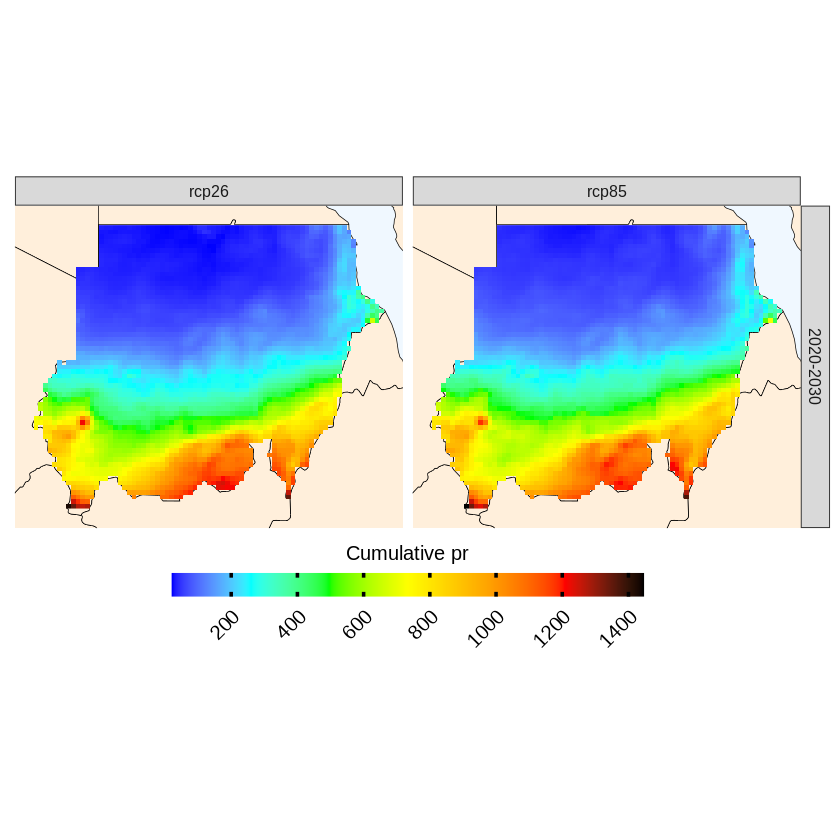

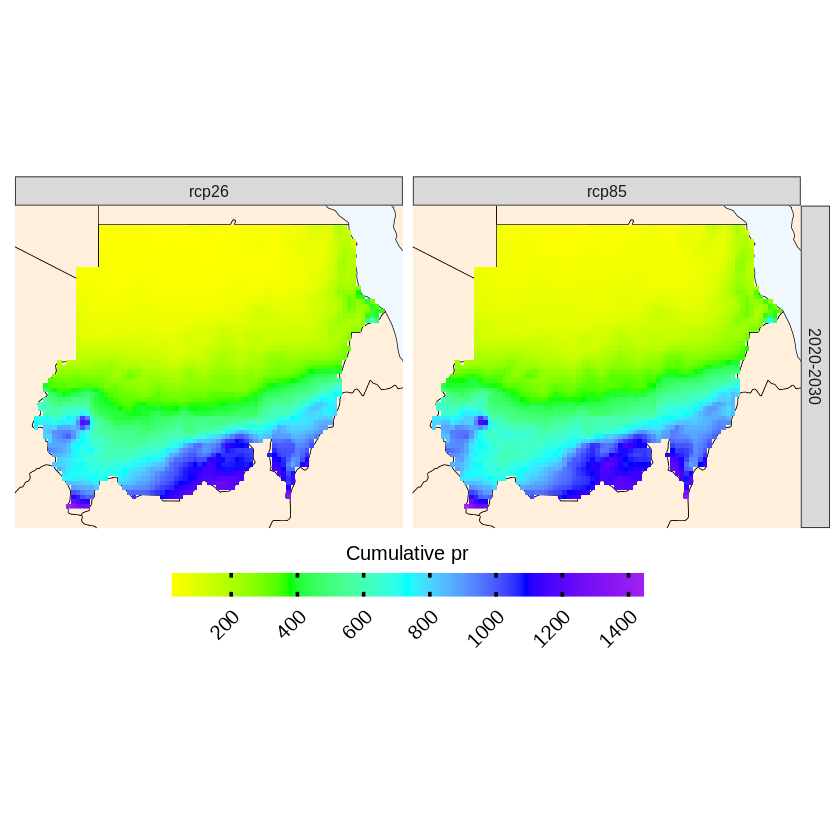

In [40]:
# default plot
plotting(proj, ensemble = TRUE, palette = NULL, legend_range = NULL,
         plot_titles = "Cumulative pr", bins = F, alpha = NA)

# specify color palette with palette
plotting(proj, ensemble = TRUE, palette = c("yellow","green", "cyan", "blue", "purple"), legend_range = NULL,
         plot_titles = "Cumulative pr", bins = F, alpha = NA)




2023-05-11 17:21:25
Visualizing ensemble mean

2023-05-11 17:21:25
Prepare for plotting

2023-05-11 17:21:25 Done

2023-05-11 17:21:25
Visualizing ensemble mean

2023-05-11 17:21:25
Prepare for plotting

2023-05-11 17:21:26 Done



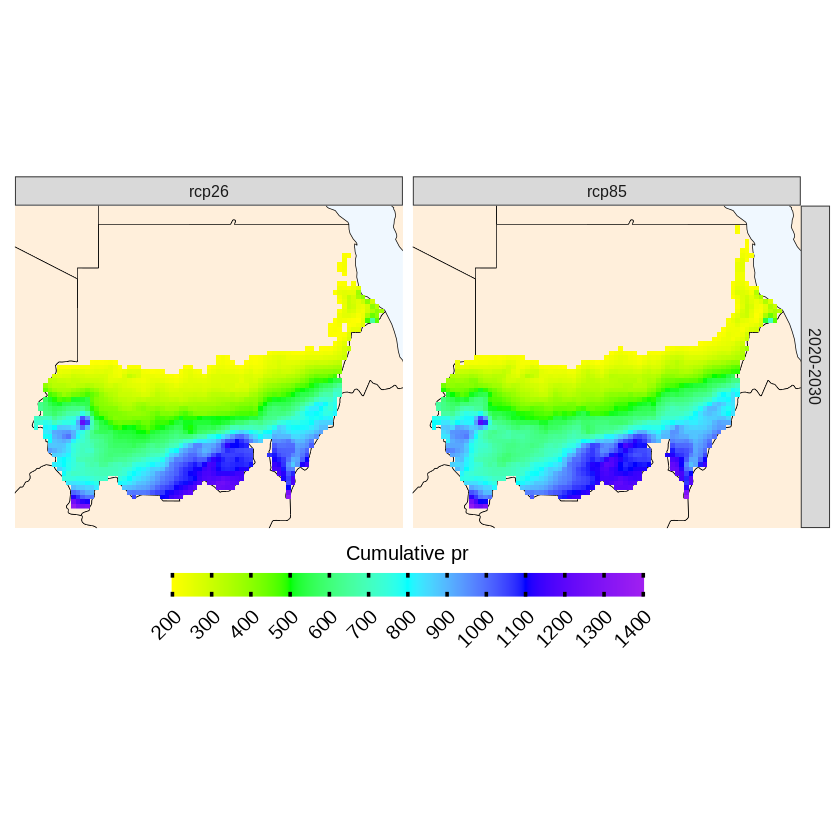

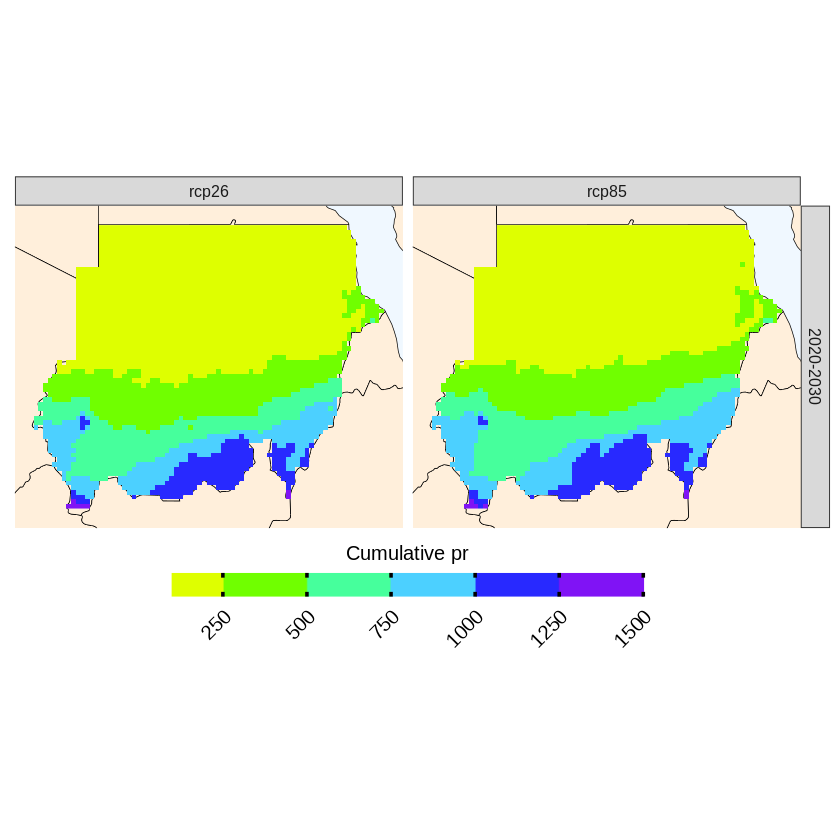

In [46]:
# set legend range with legend_range
plotting(proj, ensemble = TRUE, palette = c("yellow","green", "cyan", "blue", "purple"), legend_range = c(200,1400),
         plot_titles = "Cumulative pr", bins = F, alpha = NA)

# make bins and assignnumber of bins
plotting(proj, ensemble = TRUE, palette = c("yellow","green", "cyan", "blue", "purple"), legend_range = c(100,1500),
         plot_titles = "Cumulative pr",alpha = NA, bins = TRUE,  n.bins=7)

2023-05-11 17:22:20
Visualizing ensemble sd

2023-05-11 17:22:20
Prepare for plotting

2023-05-11 17:22:21 Done



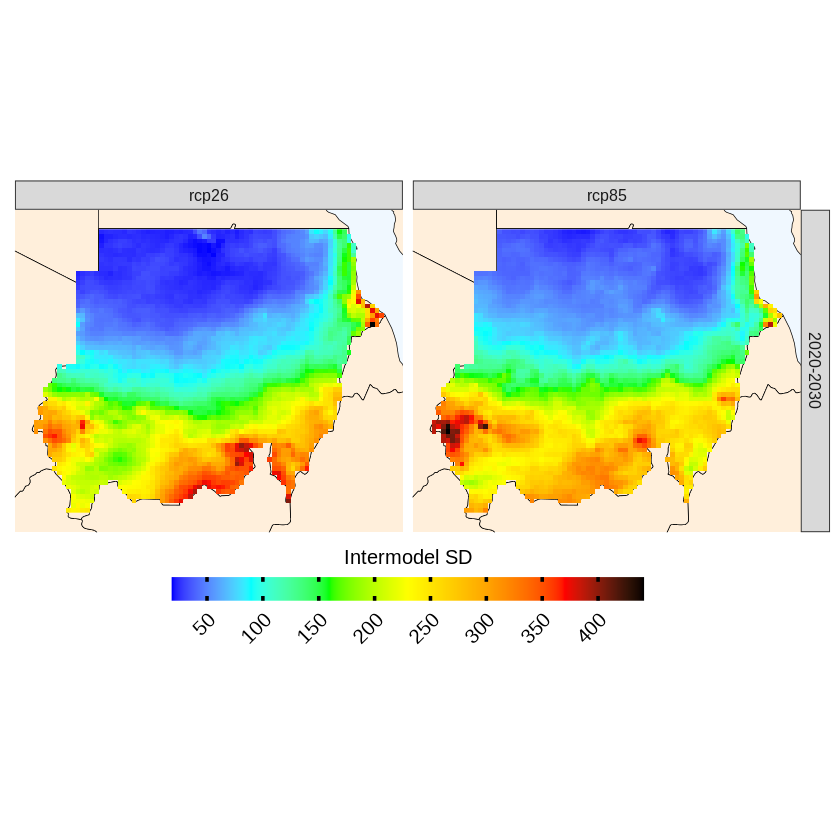

In [48]:
# It is also possible to look at the ensemble SD
plotting(proj, ensemble = TRUE, palette = NULL, legend_range = NULL,
         plot_titles = "Intermodel SD", bins = F, alpha = NA, stat="sd")

2023-05-11 17:24:27
Visualizing individual members, argument stat is ignored

2023-05-11 17:24:27
Prepare for plotting

2023-05-11 17:24:27 Done



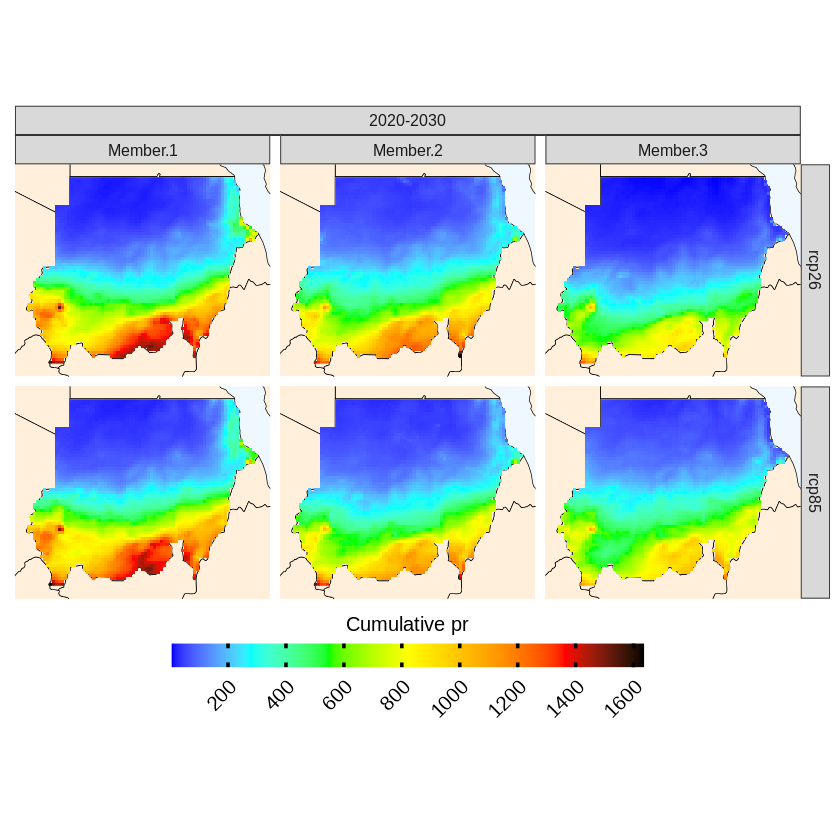

In [49]:
# And it is also possible to look at the indivisual models
plotting(proj, ensemble = FALSE, palette = NULL, legend_range = NULL,
         plot_titles = "Cumulative pr", bins = F, alpha = NA)

### Thresholds

2023-05-11 17:26:55
Visualizing ensemble mean

2023-05-11 17:26:55
Prepare for plotting

2023-05-11 17:26:56 Done



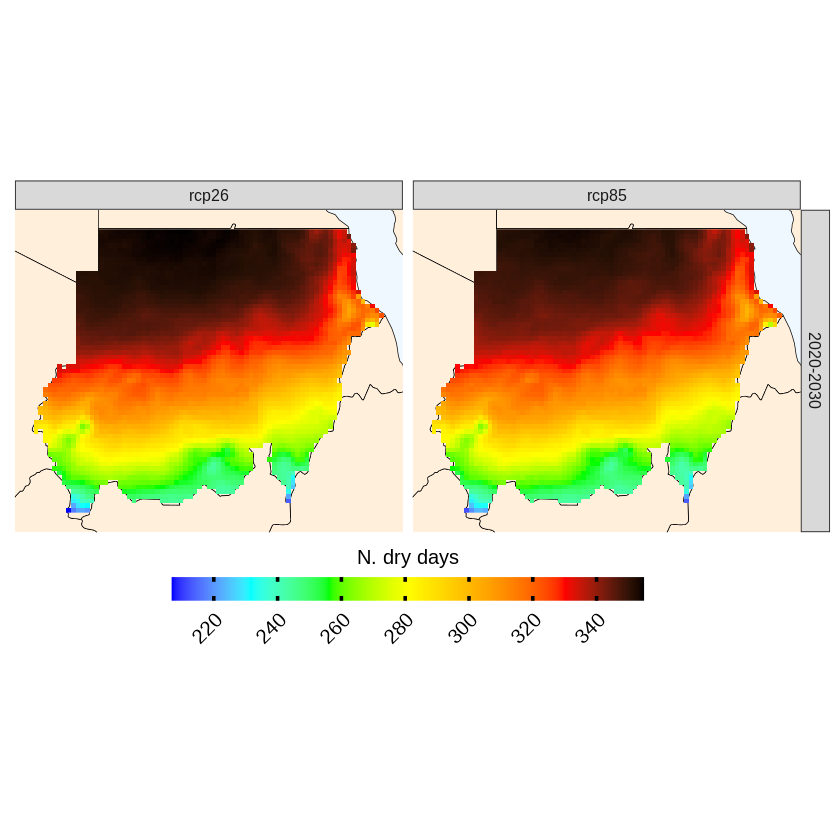

In [51]:
# we now visualize the calculation of the number of dry days
plotting(proj_dry_days , ensemble = TRUE, palette = NULL, legend_range = NULL,
         plot_titles = "N. dry days", bins = F, alpha = NA)

## What happen if we want to perform a calculation on a large area?
The above functions are quite memory intensive. This of course depends on how many years of data you are loading but also on the size of the region. If you are using your normal laptop, it is likely that you have available only 16Gb RAM. Even the above operations could potentially fail. You can monitor your RAM usage using htop or bashtop in linux OS.

To solve this issue, we combined the load_data step with the 2nd step so that the loading and calculations are performed sequentially on small chunks of spatial data. At the end of the process, the small rasters are merged together. Because the operations is performed sequentially, while slow, it saves memory allowing users to analyse entire CORDEX domains

In [17]:
# as you can see, this takes a lot of time to run. However, the amount of data retrieved is very big and 
# this function, despite being slow, allow users to process a lot of data even locally. 
# In this case, this notebook was run from the JupyterHub which has a lot of RAM available so chunk_size was relatively large (20). 
# To run this locally, consider lowering chunk_size to 5 or 2. Also, to make the process less intensive you could use agg.m="sum" to load
# monthly aggregated data instead of daily data

exmp1_chunk <-  load_data_and_projections(variable = "tasmax", years.hist = 1980:1982,
                                  years.proj = 2020:2023, path.to.data = "CORDEX-CORE",
                                  path.to.obs = NULL, xlim = c(10,50), ylim = c(-10,10), aggr.m="mean",
                                  chunk.size = 20, season = 1:12, domain="AFR-22")


2023-05-12 13:16:19 CHUNK_1_1


2023-05-12 13:16:19 Retrieving CORDEX-CORE data, RCM RegCM4. This may take a while... 


2023-05-12 13:16:21 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:00 Done


2023-05-12 13:16:22 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:01 Done


2023-05-12 13:16:23 Loading CORDEX-AFR-22_NCC-NorESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:02 Done


2023-05-12 13:17:03 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:40 Done


2023-05-12 13:17:03 Loading CORDEX-AFR-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:38 Done


2023-05-12 13:17:03 Loading CORDEX-AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:17:41 Done


2023-05-12 13:17:41 Loading CORDEX-AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_ICTP-RegCM4-7_v0

2023-05-12 13:18:18 Done


2023-05-12 13:17:42 Loading CORDEX-AFR-22_MPI-M-MPI-E

2023-05-12 13:22:52
Visualizing ensemble mean

2023-05-12 13:22:52
Prepare for plotting

2023-05-12 13:22:52 Done



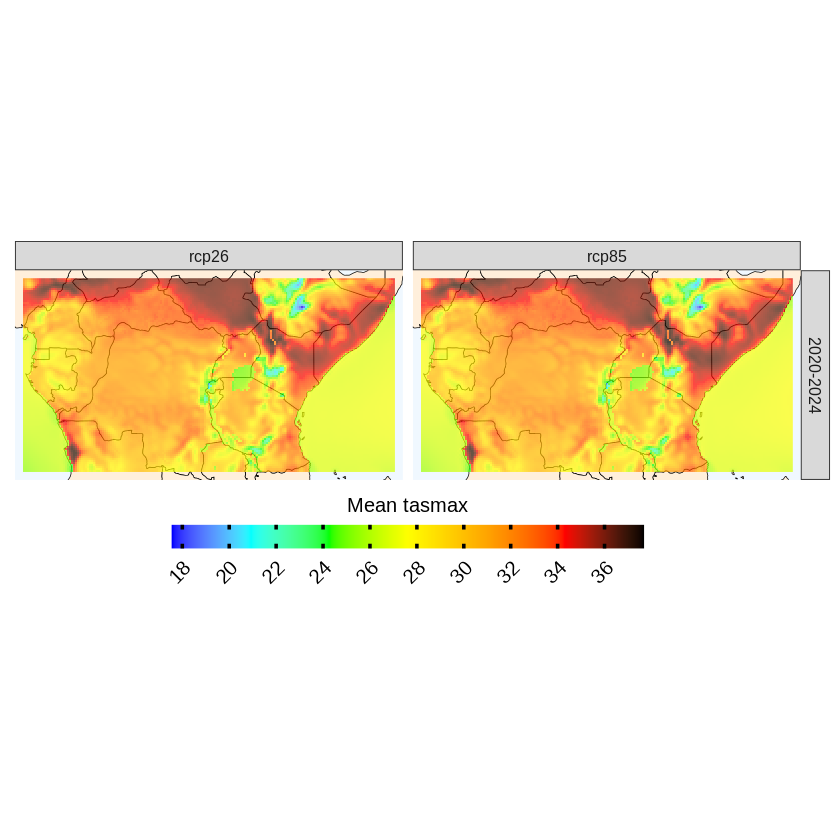

In [20]:
plotting(exmp1_chunk , ensemble = TRUE, palette = NULL, legend_range = NULL,
         plot_titles = "Mean tasmax", bins = F, alpha = 0.7)